In [69]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [33]:
# Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize

import seaborn as sns
sns.set(context='talk', rc={'figure.figsize':(10,8)})

import warnings
warnings.filterwarnings('ignore')

# importing dataset
acdnts = pd.read_csv('/Users/ellenpaigehoffman/Desktop/Thinkful/US_Accidents_May19.csv')

# dropping columns not used in this analysis
acdnts.drop(['Source', 'TMC', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng', 'Description',
             'Number', 'Street', 'Side','Country', 'Timezone', 'Airport_Code', 
             'Weather_Timestamp', 'Astronomical_Twilight', 'Nautical_Twilight', 
             'Civil_Twilight', 'Sunrise_Sunset', 'Turning_Loop', 'Traffic_Signal', 
             'Traffic_Calming', 'Stop', 'Station', 'Roundabout', 'Railway', 'No_Exit',
             'Junction','Give_Way', 'Crossing', 'Bump', 'Amenity', 'Wind_Speed(mph)',
             'Wind_Direction', 'Pressure(in)', 'Humidity(%)', 'Wind_Chill(F)','Temperature(F)',
             'County', 'Distance(mi)'], axis=1, inplace=True)

In [34]:
# data documentation states precipitation is null where there is none
# filling this field accordingly
acdnts['Precipitation(in)'] = acdnts['Precipitation(in)'].fillna(0)
acdnts[['Precipitation(in)']].isna().sum()

Precipitation(in)    0
dtype: int64

# Analysis of US Traffic Accidents
### Weather's effect on accident occurrence and impact on traffic

## Ellen Hoffman

## January 18, 2020

## About the US Accidents dataset
- Data collection began in February 2016 from MapQuest and Bing.
- There are about 2.25 million records of traffic accidents from across the U.S.
- Information includes location, driving conditions, traffic objects, severity rating (1 low to 4 high impact on traffic)

## Why is this research important?

- Nobody likes traffic.

- Nobody likes traffic accidents.

- In general, it is more challenging to drive in rain, snow and other adverse weather than in clear conditions.

- Adverse weather is commonly associated with traffic accidents.

## Is there a statistically significant relationship between weather, accidents, and traffic?

## Surprisingly, most accidents in the US take place in clear conditions.

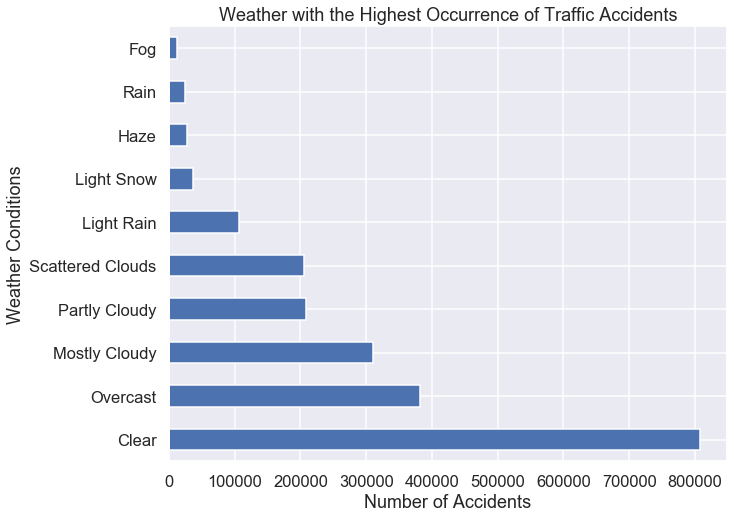

In [72]:
plt.figure(figsize=(10,8))
acdnts['Weather_Condition'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.title('Weather with the Highest Occurrence of Traffic Accidents');

## Most accidents take place when there is no precipitation.

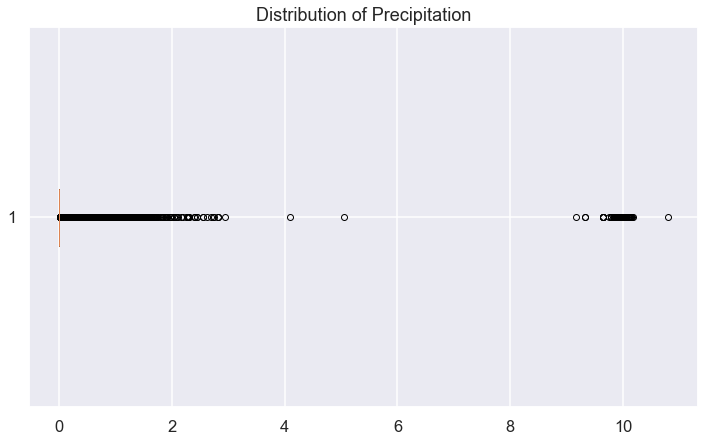

In [36]:
plt.figure(figsize=(12,7))
plt.boxplot(acdnts['Precipitation(in)'], vert=False)
plt.title('Distribution of Precipitation');

## Most accidents take place when there is about 10 miles of visibility.

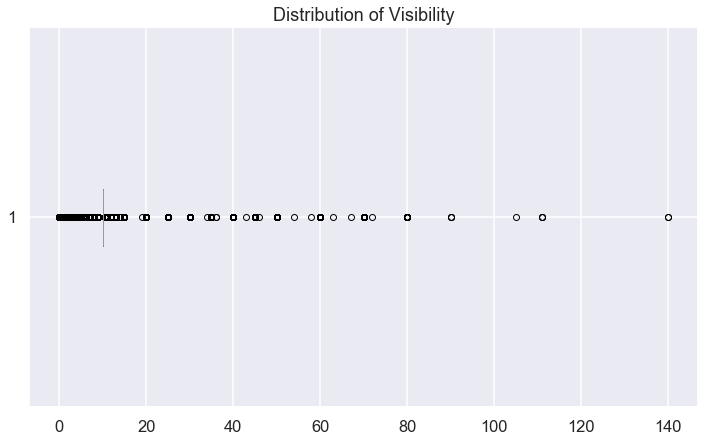

In [37]:
plt.figure(figsize=(12,7))
plt.boxplot(acdnts['Visibility(mi)'].dropna(), vert=False) # There are ~71,000 nulls (~3% of data)
plt.title('Distribution of Visibility');

## Most accidents occur in California.

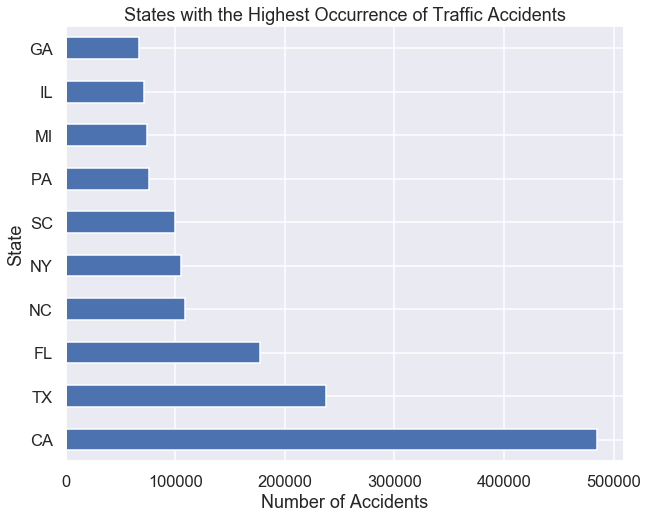

In [38]:
plt.figure(figsize=(10,8))
acdnts['State'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.title('States with the Highest Occurrence of Traffic Accidents')
plt.show()

## Despite the imbalances in this dataset, average precipitation is slightly higher and visibility is lower when weather is not clear.

In [39]:
# splitting dataset by conditions
acdnts_clr = acdnts[acdnts['Weather_Condition'] == 'Clear']
acdnts_unclr = acdnts[acdnts['Weather_Condition'] != 'Clear']

# dropping what appear to be errors in data collection,
# clear conditions where precipitation > 8in
to_drop = acdnts_clr[acdnts_clr['Precipitation(in)'] > 8].index
acdnts_clr.drop(to_drop , inplace=True)

In [40]:
print('Clear, Precipitation')
print(acdnts_clr['Precipitation(in)'].describe().round(2))
print('---')
print('Other, Precipitation')
print(acdnts_unclr['Precipitation(in)'].describe().round(2))

Clear, Precipitation
count    808020.00
mean          0.00
std           0.00
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           0.93
Name: Precipitation(in), dtype: float64
---
Other, Precipitation
count    1435757.00
mean           0.01
std            0.16
min            0.00
25%            0.00
50%            0.00
75%            0.00
max           10.80
Name: Precipitation(in), dtype: float64


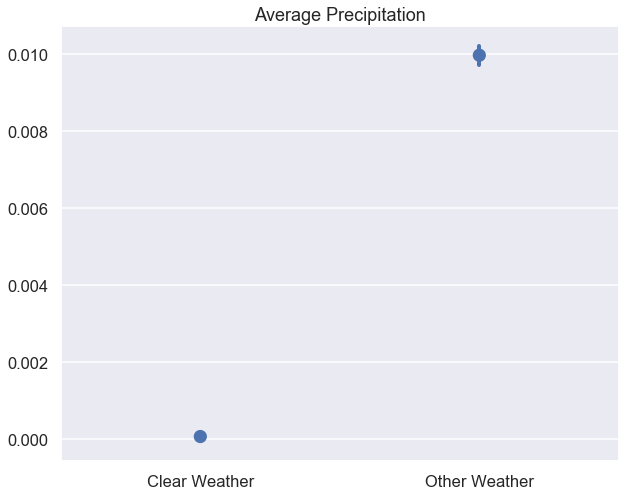

In [41]:
g = sns.pointplot(data=[acdnts_clr['Precipitation(in)'],
                        acdnts_unclr['Precipitation(in)']], join=False)
                        
g.set(xticklabels = ['Clear Weather', 'Other Weather'])
plt.title('Average Precipitation');

In [42]:
# t-test indicates difference in averages is significant
stats.ttest_ind(acdnts_clr['Precipitation(in)'], acdnts_unclr['Precipitation(in)'])

Ttest_indResult(statistic=-56.41500897214882, pvalue=0.0)

- Clear weather: 0.0 inches
- Other weather: 0.01 inches

In [43]:
print('Clear, Visibility')
print(acdnts_clr['Visibility(mi)'].describe().round(2))
print('---')
print('Other, Visibility')
print(acdnts_unclr['Visibility(mi)'].describe().round(2))

Clear, Visibility
count    805395.00
mean          9.86
std           1.65
min           0.00
25%          10.00
50%          10.00
75%          10.00
max         140.00
Name: Visibility(mi), dtype: float64
---
Other, Visibility
count    1367048.00
mean           8.69
std            3.47
min            0.00
25%            9.00
50%           10.00
75%           10.00
max          111.00
Name: Visibility(mi), dtype: float64


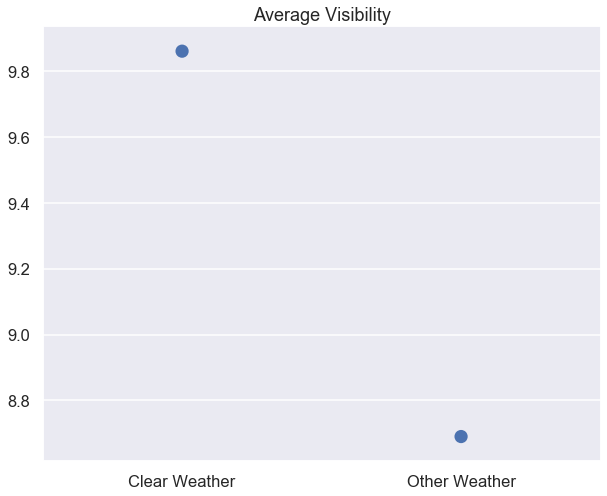

In [44]:
g = sns.pointplot(data=[acdnts_clr['Visibility(mi)'],
                        acdnts_unclr['Visibility(mi)']], join=False)
g.set(xticklabels = ['Clear Weather', 'Other Weather'])
plt.title('Average Visibility');

In [45]:
# t-test indicates difference in averages is significant
print(stats.ttest_ind(acdnts_clr['Visibility(mi)'].dropna(), acdnts_unclr['Visibility(mi)'].dropna()))

Ttest_indResult(statistic=284.0692205462446, pvalue=0.0)


- Clear weather: 9.9 miles
- Other weather: 8.7 miles

## Does weather affect an accident's impact on traffic?

## Severity is a 4-point scale, where 1 is low and 4 is high impact on traffic.

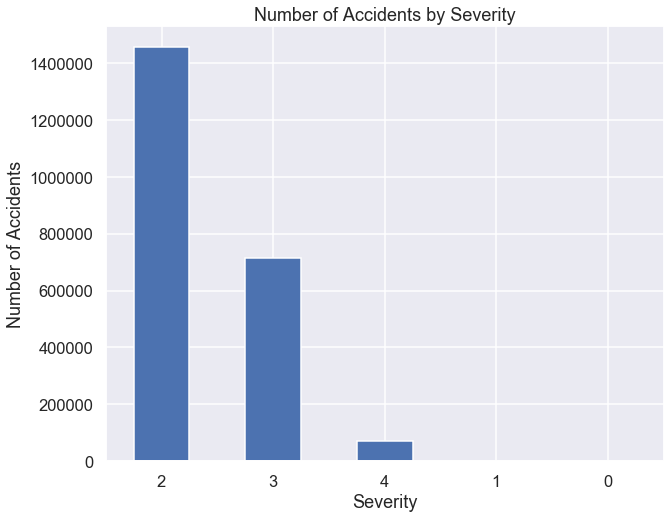

In [46]:
acdnts['Severity'].value_counts().plot('bar')
plt.xlabel('Severity')
plt.xticks(rotation=0)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity')
plt.show()

In [47]:
acdnts.groupby('Severity')['ID'].count()

Severity
0         17
1        814
2    1455524
3     715582
4      72002
Name: ID, dtype: int64

## Average severity in the most common weather conditions ranges from 2.25 to 2.5.

In [48]:
top_weather = acdnts['Weather_Condition'].value_counts().head(10) 
list(top_weather.index) # creating a list with top conditions

['Clear',
 'Overcast',
 'Mostly Cloudy',
 'Partly Cloudy',
 'Scattered Clouds',
 'Light Rain',
 'Light Snow',
 'Haze',
 'Rain',
 'Fog']

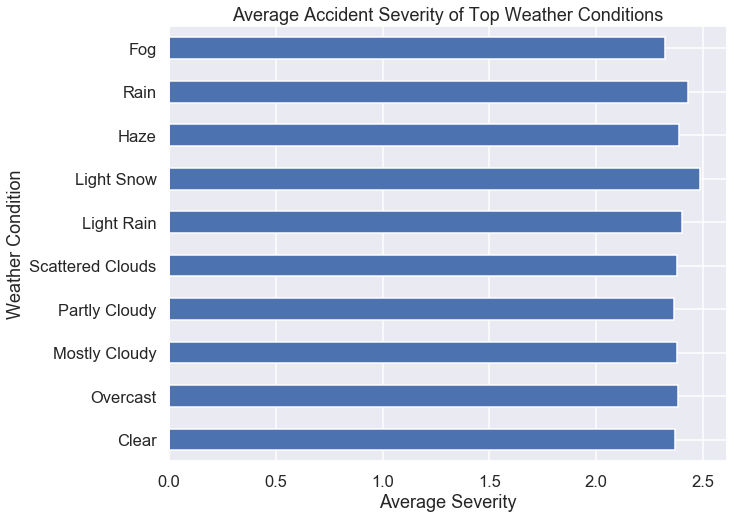

In [49]:
mean_severity = acdnts.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
mean_severity[list(top_weather.index)].plot('barh')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.title('Average Accident Severity of Top Weather Conditions')
plt.show()

## There is no correlation between precipitation and severity or visibility and severity.

In [50]:
# Precipitation
pearsonr(acdnts['Severity'], acdnts['Precipitation(in)'])

(0.005103574761565875, 2.0879957287617477e-14)

In [51]:
# Visibility
acdnts2 = acdnts.copy() # copying the df
acdnts2.dropna(subset=['Visibility(mi)'], inplace = True) # dropping visibility nulls

pearsonr(acdnts2['Severity'], acdnts2['Visibility(mi)'])

(-0.009543188346200661, 6.087930575797077e-45)

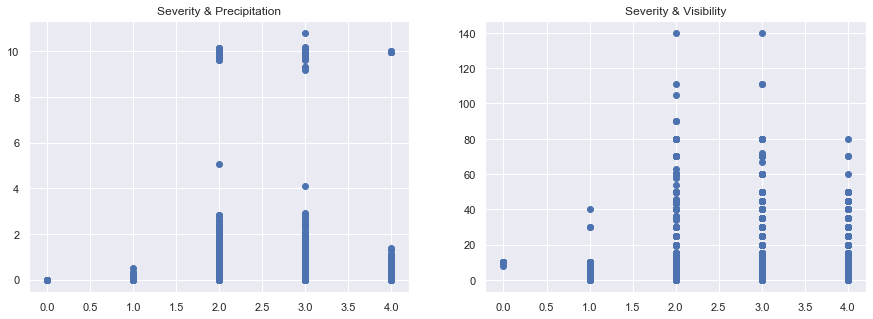

In [52]:
sns.set(context='notebook')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.scatter(acdnts['Severity'], acdnts['Precipitation(in)'])
ax1.set_title('Severity & Precipitation')
ax2.scatter(acdnts2['Severity'], acdnts2['Visibility(mi)'])
ax2.set_title('Severity & Visibility');

**The Pearson Correlation coefficients are close to 0.** 

## There are small, but significant increases in average severity as rain increases.

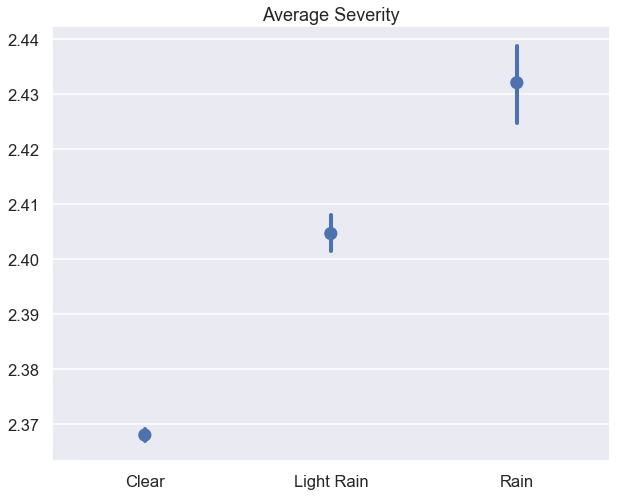

In [53]:
sns.set(context='talk')

clr_acdnts = acdnts[(acdnts['Weather_Condition'] == 'Clear')]
rain_acdnts = acdnts[(acdnts['Weather_Condition'] == 'Rain')]
lite_acdnts = acdnts[(acdnts['Weather_Condition'] == 'Light Rain')]

g = sns.pointplot(data=[clr_acdnts['Severity'],
                        lite_acdnts['Severity'],
                        rain_acdnts['Severity']], join=False)
g.set(xticklabels = ['Clear', 'Light Rain', 'Rain'])
plt.title('Average Severity');

In [54]:
print('Clear and Light Rain:')
print(stats.ttest_ind(clr_acdnts['Severity'], lite_acdnts['Severity']))
print('---')

print('Clear and Rain:')
print(stats.ttest_ind(clr_acdnts['Severity'], rain_acdnts['Severity']))
print('---')

print('Light Rain and Rain:')
print(stats.ttest_ind(lite_acdnts['Severity'], rain_acdnts['Severity']))

Clear and Light Rain:
Ttest_indResult(statistic=-20.580774418776464, pvalue=4.2869766309024177e-94)
---
Clear and Rain:
Ttest_indResult(statistic=-18.160921968546813, pvalue=1.0875546276033734e-73)
---
Light Rain and Rain:
Ttest_indResult(statistic=-7.088021079334285, pvalue=1.3672084837285844e-12)


In [55]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(clr_acdnts['Severity'], rain_acdnts['Severity']))

The difference in means at the 95% confidence interval (two-tail) is between 0.05706878081262093 and 0.07090156697360414.


## With 95% confidence, average severity is between 0.06 and 0.07 points higher in rain than in clear weather.

## There is a small, but significant decrease in average severity with fog.

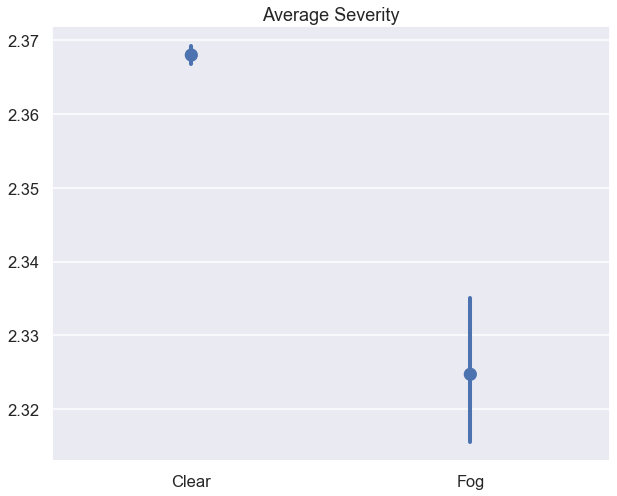

In [56]:
fog_acdnts = acdnts[(acdnts['Weather_Condition'] == 'Fog')]

g = sns.pointplot(data=[clr_acdnts['Severity'],
                        fog_acdnts['Severity']], join=False)
                       
g.set(xticklabels = ['Clear', 'Fog'])
plt.title('Average Severity');

In [57]:
stats.ttest_ind(clr_acdnts['Severity'], fog_acdnts['Severity'])

Ttest_indResult(statistic=8.479281107865944, pvalue=2.2695696146689358e-17)

In [58]:
get_95_ci(clr_acdnts['Severity'], fog_acdnts['Severity'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.053311687599648765 and -0.033327412007653996.'

## With 95% confidence, average severity in fog is between 0.03 and 0.05 points lower than in clear conditions.

## These severity levels suggest relatively low impact.

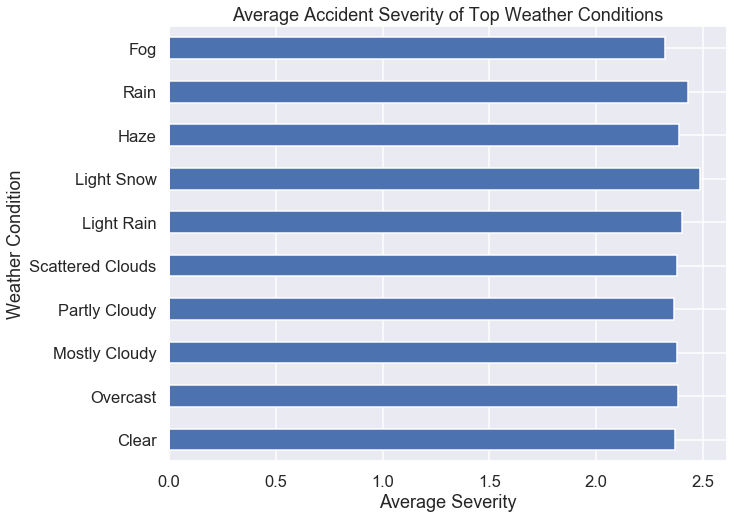

In [59]:
mean_severity[list(top_weather.index)].plot('barh')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')
plt.title('Average Accident Severity of Top Weather Conditions')
plt.show()

## What about high impact accidents?

In [61]:
# Creating df to look at severity 4 accidents alone
acdnts_4 = acdnts[acdnts['Severity']==4]
acdnts_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72002 entries, 619 to 2243938
Data columns (total 10 columns):
ID                   72002 non-null object
Severity             72002 non-null int64
Start_Lat            72002 non-null float64
Start_Lng            72002 non-null float64
City                 71990 non-null object
State                72002 non-null object
Zipcode              71942 non-null object
Visibility(mi)       68323 non-null float64
Precipitation(in)    72002 non-null float64
Weather_Condition    68239 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 6.0+ MB


## Most severity 4 accidents also take place in clear conditions.

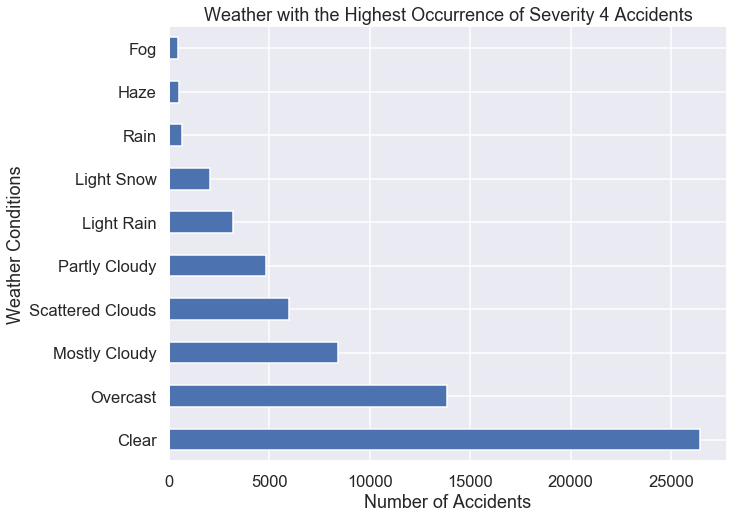

In [62]:
acdnts_4['Weather_Condition'].value_counts().head(10).plot('barh')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.title('Weather with the Highest Occurrence of Severity 4 Accidents');

## There are more severity 4 accidents in the 'Sunshine State' than in any other.

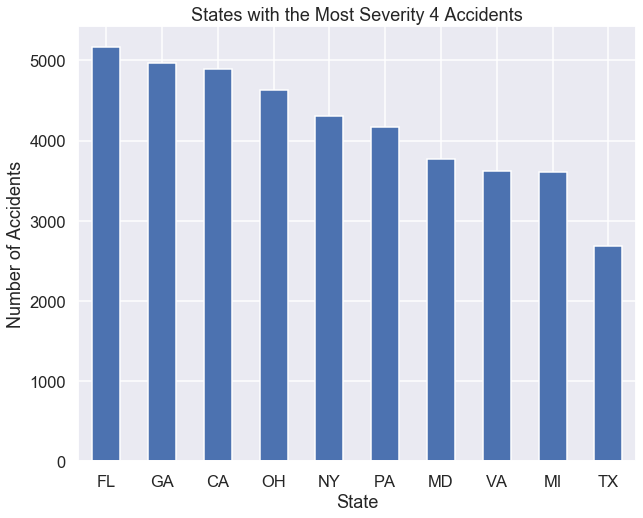

In [63]:
acdnts_4['State'].value_counts().head(10).plot('bar')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.ylabel('Number of Accidents')
plt.title('States with the Most Severity 4 Accidents')
plt.show()

## Accidents and severity levels appear evenly distributed throughout Florida.

In [64]:
acdnts_FL = acdnts[acdnts['State']=='FL']

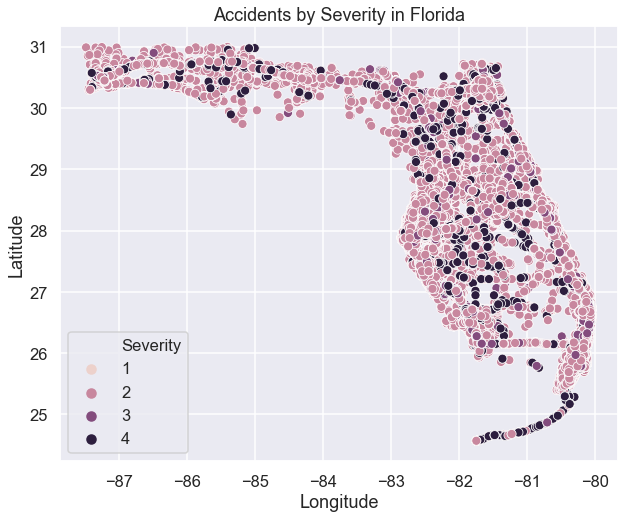

In [65]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_FL, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents by Severity in Florida')
plt.show()

## In Georgia, there are more accidents north, with severity levels evenly distributed.

In [66]:
acdnts_GA = acdnts[acdnts['State']=='GA']

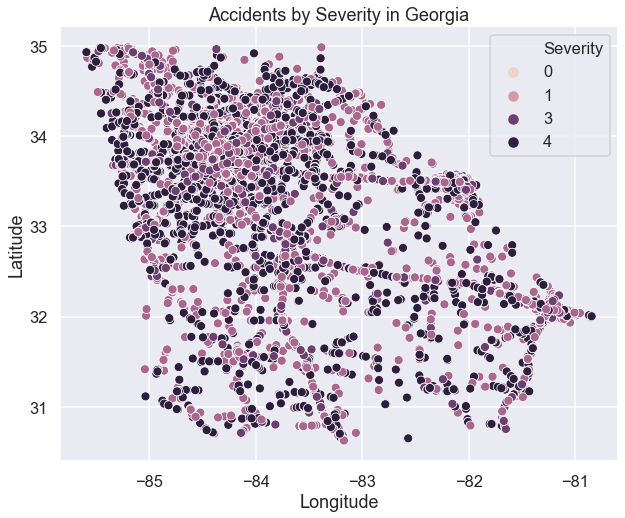

In [67]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=acdnts_GA, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents by Severity in Georgia')
plt.show()

## Conclusions:

- Most accidents in the U.S. occur during clear weather.

- Neither precipitation nor visibility have significant relationships with an accident's impact on traffic.

- Average impact on traffic is higher in rain and lower in fog, than in clear weather.

- More analysis is needed to determine variables that indicate accidents that greatly impact traffic.

## Next Steps:

### 1. More research! Combine this dataset with data on...

- Weather in a location and a span of time

- Population and total number of drivers

- Budget and strategies for road safety and infrastructure  
    - Florida and Georgia were among states reported to spend the least per capita by the Urban Institute.

### 2. Experiment

- Implement 'Drive Carefully' flashing road signs during rain in select areas

- Measure the impact on traffic when accidents do occur in rain and see if average severity is lower in test areas than control areas

## Questions?

## Acknowledgments
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [68]:
# jupyter nbconvert Capstone1FinalPresent.ipynb --to slides --post serve